<a href="https://colab.research.google.com/github/coldjoke123/python1/blob/master/0503.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# 引入手寫數字資料

In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [0]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

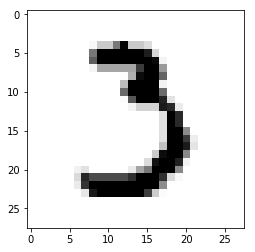

In [65]:
X = x_train[330].reshape(28,28)
plt.imshow(X, cmap = 'Greys')

# 基本資料的調整

In [0]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD
from keras.layers import Input
from keras.layers import concatenate, add
from keras.models import Model

# 構造模型，選用三層CNN及兩層有分支的NN

In [0]:
x = Input(shape=(28,28,1))

In [0]:
f_1 = Conv2D(8,(5,5), padding='same',activation='relu')
p_1 = MaxPool2D(pool_size=(2,2))
f_2 = Conv2D(16,(5,5), padding='same', activation='relu')
p_2 = MaxPool2D(pool_size=(2,2))
f_3 = Conv2D(32,(5,5), padding='same', activation='sigmoid')
p_3 = MaxPool2D(pool_size=(2,2))
f_41 = Dense(50, activation='relu')
f_42 = Dense(30, activation='sigmoid')
f_5 = Dense(30, activation='relu')
f_6 = Dense(10, activation='softmax')

In [0]:
h_1 = p_1(f_1(x))
h_2 = p_2(f_2(h_1))
h_3 = Flatten()(p_3(f_3(h_2)))
h_41 = f_41(h_3)
h_42 = f_42(h_3)
h_5 = concatenate([h_41, h_42])
u = f_5(h_5)
y = f_6(u)

In [0]:
model = Model(x,y)

# 下圖為此模型的圖像

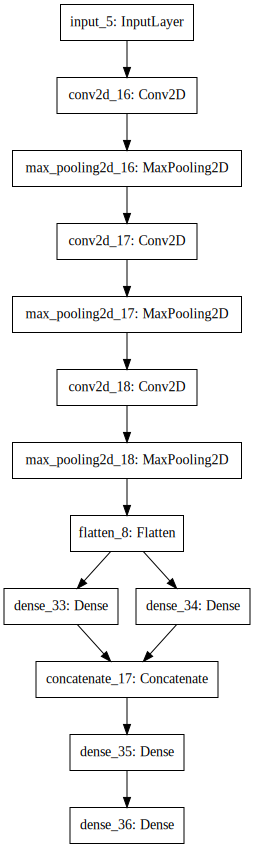

In [79]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [80]:
model.compile(loss = 'mse', optimizer=SGD(lr = 0.5), metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 28, 28, 8)    208         input_5[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_16 (MaxPooling2D) (None, 14, 14, 8)    0           conv2d_16[0][0]                  
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 14, 14, 16)   3216        max_pooling2d_16[0][0]           
__________________________________________________________________________________________________
max_poolin

In [82]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 59s 978us/step - loss: 0.0898 - acc: 0.1197
Epoch 2/10
60000/60000 [==============================] - 59s 983us/step - loss: 0.0879 - acc: 0.2542
Epoch 3/10
60000/60000 [==============================] - 58s 970us/step - loss: 0.0394 - acc: 0.7365
Epoch 4/10
60000/60000 [==============================] - 58s 973us/step - loss: 0.0107 - acc: 0.9327
Epoch 5/10
60000/60000 [==============================] - 58s 973us/step - loss: 0.0070 - acc: 0.9561
Epoch 6/10
60000/60000 [==============================] - 58s 974us/step - loss: 0.0054 - acc: 0.9659
Epoch 7/10
60000/60000 [==============================] - 59s 982us/step - loss: 0.0046 - acc: 0.9709
Epoch 8/10
60000/60000 [==============================] - 58s 974us/step - loss: 0.0040 - acc: 0.9743
Epoch 9/10
60000/60000 [==============================] - 59s 981us/step - loss: 0.0035 - acc: 0.9782
Epoch 10/10
60000/60000 [==============================] - 59s 982us/step - loss: 

In [83]:
score = model.evaluate(x_test,y_test)
print('loss:', score[0])
print('正確率:', score[1])

10000/10000 [==============================] - 5s 509us/step
loss: 0.0034176741636787484
正確率: 0.9782


# 正確率高達$97.82\%$!!

# 試著將loss function 選用categorical crossentropy


In [84]:
model.compile(loss = 'categorical_crossentropy', optimizer=SGD(lr = 0.5), metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 28, 28, 8)    208         input_5[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_16 (MaxPooling2D) (None, 14, 14, 8)    0           conv2d_16[0][0]                  
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 14, 14, 16)   3216        max_pooling2d_16[0][0]           
__________________________________________________________________________________________________
max_poolin

In [85]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 59s 988us/step - loss: 14.4671 - acc: 0.1022
Epoch 2/10
60000/60000 [==============================] - 59s 984us/step - loss: 14.5200 - acc: 0.0991
Epoch 3/10
60000/60000 [==============================] - 59s 982us/step - loss: 14.5200 - acc: 0.0991
Epoch 4/10
60000/60000 [==============================] - 59s 980us/step - loss: 14.5200 - acc: 0.0992
Epoch 5/10
60000/60000 [==============================] - 59s 988us/step - loss: 14.5200 - acc: 0.0991
Epoch 6/10
60000/60000 [==============================] - 59s 981us/step - loss: 14.5200 - acc: 0.0991
Epoch 7/10
60000/60000 [==============================] - 59s 984us/step - loss: 14.5200 - acc: 0.0992
Epoch 8/10
60000/60000 [==============================] - 58s 975us/step - loss: 14.5200 - acc: 0.0992
Epoch 9/10
60000/60000 [==============================] - 59s 982us/step - loss: 14.5200 - acc: 0.0991
Epoch 10/10
60000/60000 [==============================] - 59s 980us/step

In [86]:
score = model.evaluate(x_test,y_test)
print('loss:', score[0])
print('正確率:', score[1])

10000/10000 [==============================] - 5s 545us/step
loss: 14.491779391479492
正確率: 0.1009


# 結果不盡理想.....ＱＱ，竟然只有$10.09\%$

# 改成binary crossentropy試試看

In [88]:
model.compile(loss = 'binary_crossentropy', optimizer=SGD(lr = 0.5), metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 28, 28, 8)    208         input_5[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_16 (MaxPooling2D) (None, 14, 14, 8)    0           conv2d_16[0][0]                  
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 14, 14, 16)   3216        max_pooling2d_16[0][0]           
__________________________________________________________________________________________________
max_poolin

In [89]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 59s 989us/step - loss: 2.8882 - acc: 0.8198
Epoch 2/10
60000/60000 [==============================] - 59s 991us/step - loss: 2.8882 - acc: 0.8198
Epoch 3/10
60000/60000 [==============================] - 59s 991us/step - loss: 2.8882 - acc: 0.8198
Epoch 4/10
60000/60000 [==============================] - 59s 989us/step - loss: 2.8882 - acc: 0.8198
Epoch 5/10
60000/60000 [==============================] - 59s 991us/step - loss: 2.8882 - acc: 0.8198
Epoch 6/10
60000/60000 [==============================] - 59s 981us/step - loss: 2.8882 - acc: 0.8198
Epoch 7/10
60000/60000 [==============================] - 59s 981us/step - loss: 2.8882 - acc: 0.8198
Epoch 8/10
60000/60000 [==============================] - 59s 978us/step - loss: 2.8882 - acc: 0.8198
Epoch 9/10
60000/60000 [==============================] - 59s 978us/step - loss: 2.8882 - acc: 0.8198
Epoch 10/10
60000/60000 [==============================] - 59s 983us/step - loss: 

In [90]:
score = model.evaluate(x_test,y_test)
print('loss:', score[0])
print('正確率:', score[1])

10000/10000 [==============================] - 6s 555us/step
loss: 2.88255743560791
正確率: 0.8201800062179565


# loss function選mse的結果最好，但不知為何選binary crossentropy的training會如此詭異＠＠